In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [60]:
df = pd.read_csv('train.csv')

In [61]:
df.head()

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC
0,795823,Split,1.5,6579.15,43,1873.5,3,3.0,5.0,0,1.720,31.333333,Cairo,2863.2952214614106,1.924
1,506848,Window,1.1,6775.44,46,1603.8000000000002,4,4.0,1.0,0,18.000,29.500000,Bucharest,2783.3096980924593,1.341
2,441027,Portable,3.8,6995.22,29,4807.0,38,4.0,1.0,0,0.551,13.763158,Berlin,2882.6064181342504,2.702
3,160677,Window,1.2,1863.68,39,1466.3999999999999,10,4.0,0.0,0,19.540,22.900000,Cape Town,2607.0895663486162,1.541
4,902932,Window,NaN,3089.04,40,3139.4,9,5.0,4.0,0,16.760,18.444444,Berlin,2681.3591611159786,2.182


In [62]:
df.tail()

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC
14995,603501,Portable,2.8,6216.96,36,4110.4,32,5.0,4.0,0,14.584,15.125000,Bucharest,2832.1845186906185,2.226
14996,818366,Window,3.2,1910.04,43,4761.6,9,4.0,6.0,0,15.394,14.777778,Moscow,2947.2485613951394,2.144
14997,237449,Split,1.2,3587.36,31,1759.2,14,5.0,4.0,0,0.031,16.214286,Sao Paolo,2708.9834918645342,1.179
14998,876031,Ducted,1.5,2294.25,36,1828.5,12,1.0,1.0,0,13.828,19.000000,Moscow,2706.6074058005474,1.944
14999,935793,Portable,3.5,7927.20,42,4445.0,17,2.0,5.0,0,6.916,17.470588,Sao Paolo,3267.6594424896157,3.088


In [63]:
df.shape

(15000, 15)

In [64]:
df.isnull().sum()/100

ID                             0.00
Type_of_AC                     0.00
Model                          8.70
Cooling_Capacity               0.00
Avg_Temp                       0.00
Room_SIze                     10.13
Num_People                     0.00
Star_Rating                    8.97
Age_of_Unit                    9.82
Maintenance                    0.00
Avg_Usage                      0.00
Avg_AC_Temp                    0.00
City                          14.94
Input_Power                    7.13
Electricity_Consumption_AC     0.00
dtype: float64

In [65]:
for i in df.columns:
  if df[i].dtype!='object':
    df[i].fillna(df[i].mean(),inplace=True)

In [66]:
for i in df.columns:
  if df[i].dtype=='object':
    df[i].fillna(df[i].mode()[0],inplace=True)

In [67]:
df.isnull().sum()

ID                            0
Type_of_AC                    0
Model                         0
Cooling_Capacity              0
Avg_Temp                      0
Room_SIze                     0
Num_People                    0
Star_Rating                   0
Age_of_Unit                   0
Maintenance                   0
Avg_Usage                     0
Avg_AC_Temp                   0
City                          0
Input_Power                   0
Electricity_Consumption_AC    0
dtype: int64

In [68]:
df.duplicated().sum()

0

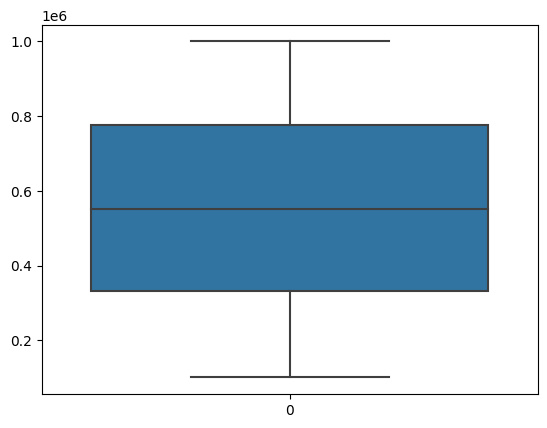

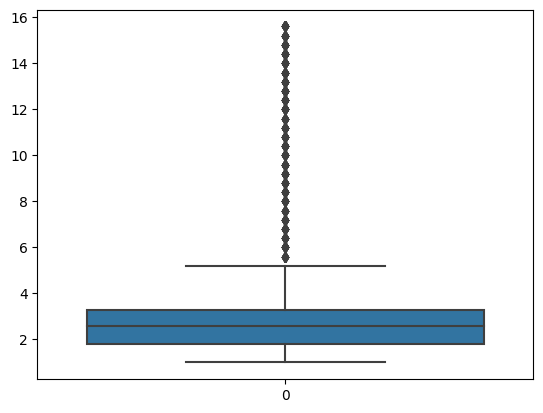

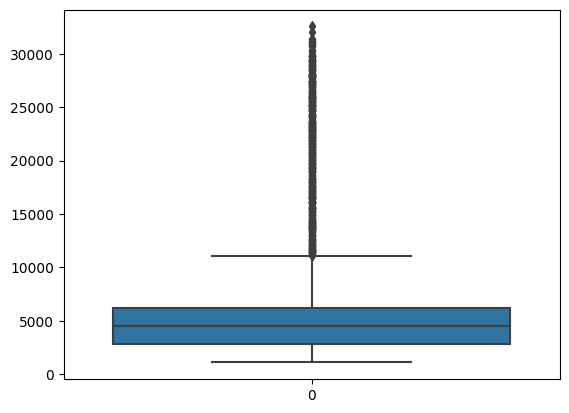

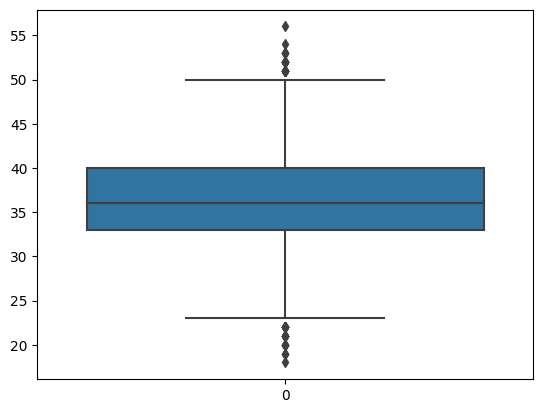

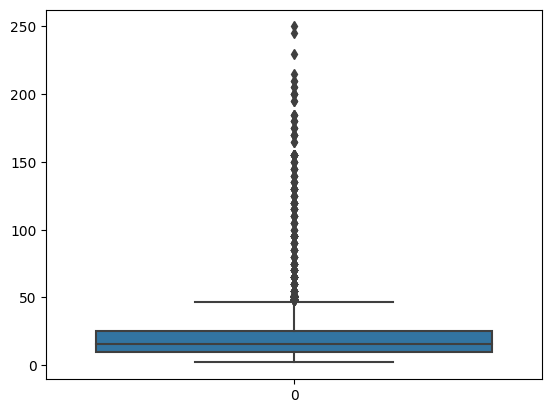

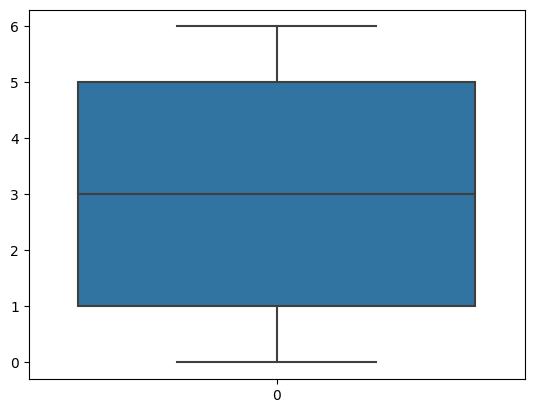

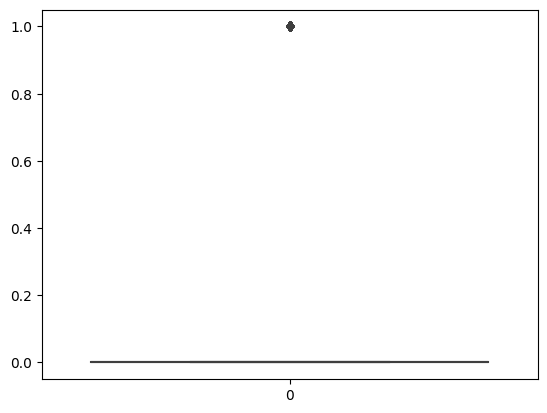

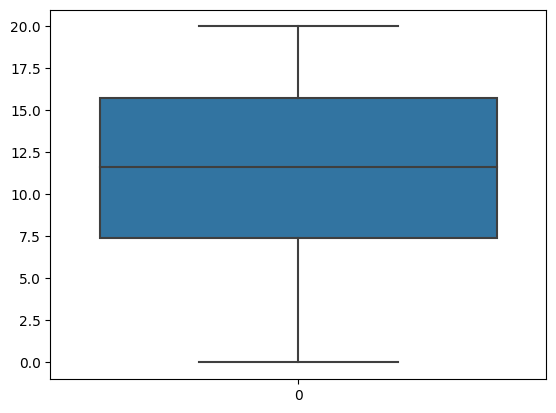

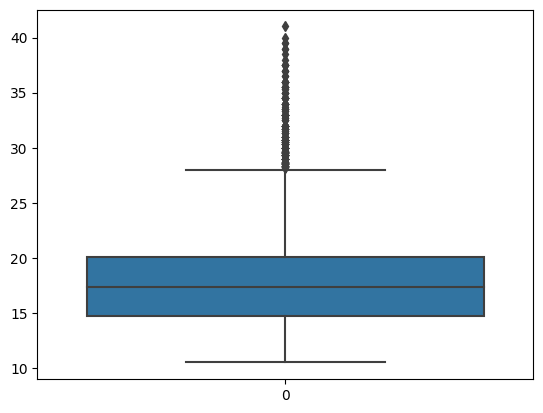

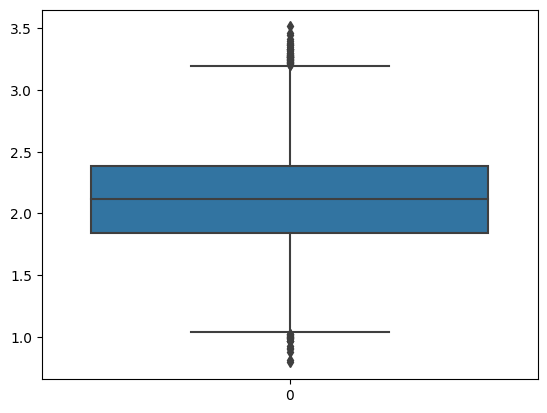

In [69]:
for i in df.columns:
  if df[i].dtype!='object':
    sns.boxplot(df[i])
    plt.show()

In [70]:
for i in df.columns:
  if df[i].dtype!='object':
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    Outer_layer = Q3+1.5*IQR
    Lower_layer = Q1-1.5*IQR
    Outer_layer,Lower_layer

    df.loc[df[i] <Lower_layer, i] = Lower_layer
    df.loc[df[i] >Outer_layer, i] = Outer_layer

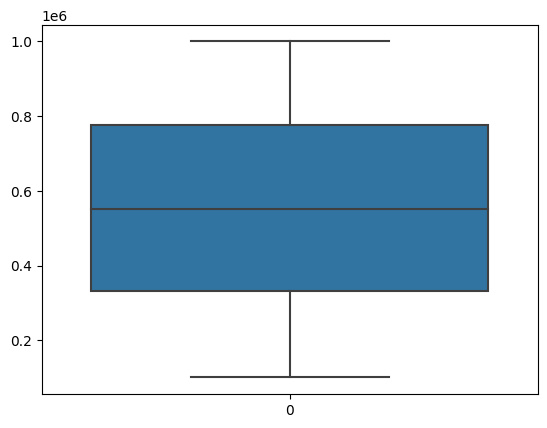

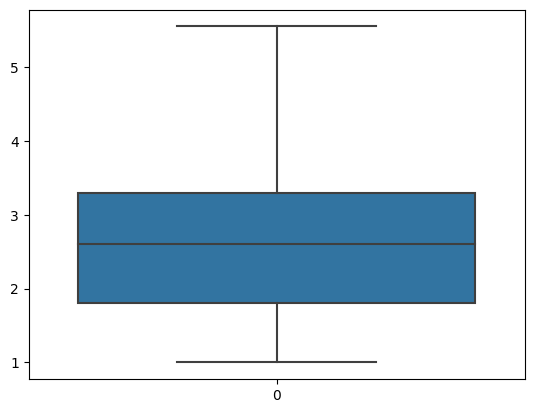

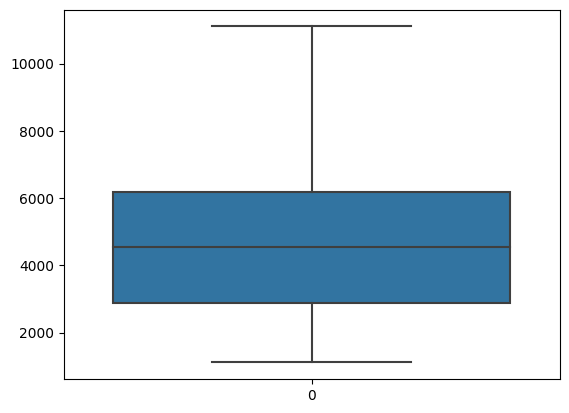

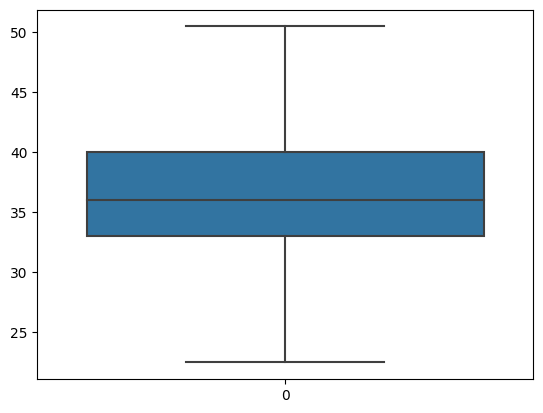

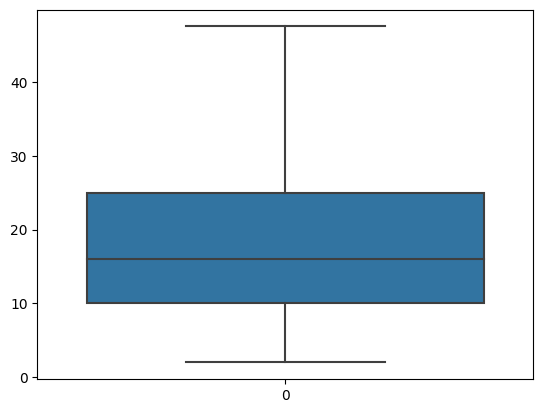

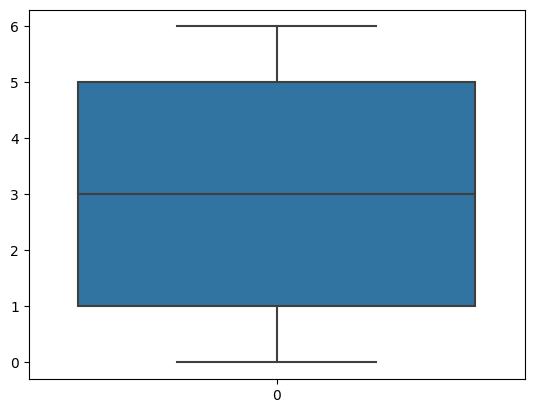

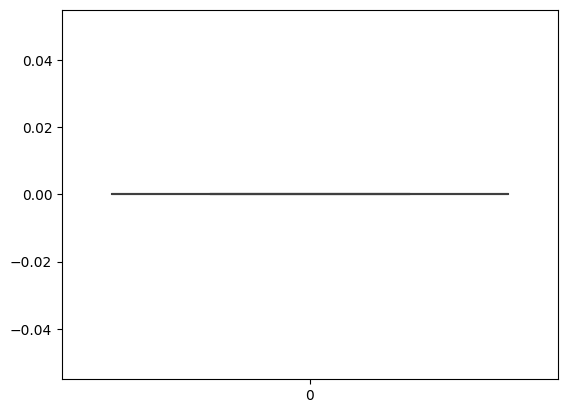

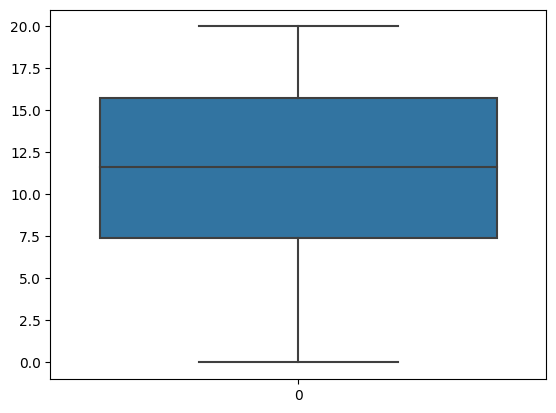

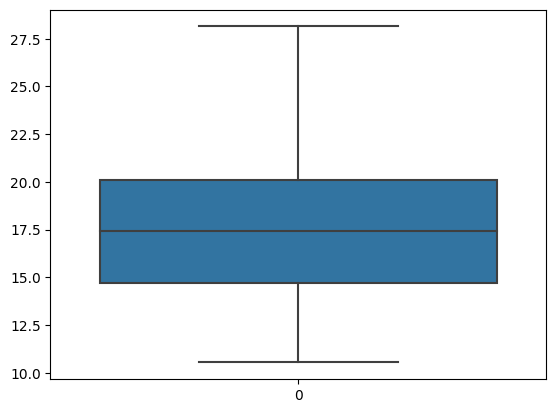

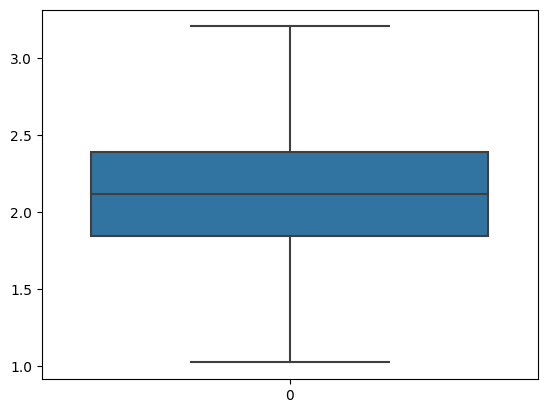

In [71]:
for i in df.columns:
  if df[i].dtype!='object':
    sns.boxplot(df[i])
    plt.show()

In [72]:
df.columns

Index(['ID', 'Type_of_AC', 'Model', 'Cooling_Capacity', 'Avg_Temp',
       'Room_SIze', 'Num_People', 'Star_Rating', 'Age_of_Unit', 'Maintenance',
       'Avg_Usage', 'Avg_AC_Temp', 'City', 'Input_Power',
       'Electricity_Consumption_AC'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          15000 non-null  float64
 1   Type_of_AC                  15000 non-null  object 
 2   Model                       15000 non-null  float64
 3   Cooling_Capacity            15000 non-null  float64
 4   Avg_Temp                    15000 non-null  float64
 5   Room_SIze                   15000 non-null  object 
 6   Num_People                  15000 non-null  float64
 7   Star_Rating                 15000 non-null  object 
 8   Age_of_Unit                 15000 non-null  float64
 9   Maintenance                 15000 non-null  int64  
 10  Avg_Usage                   15000 non-null  float64
 11  Avg_AC_Temp                 15000 non-null  float64
 12  City                        15000 non-null  object 
 13  Input_Power                 150

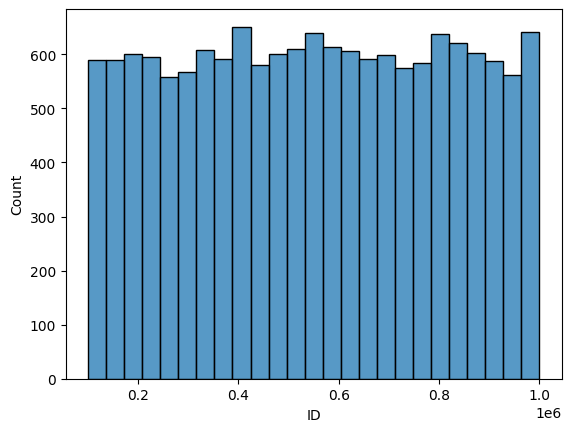

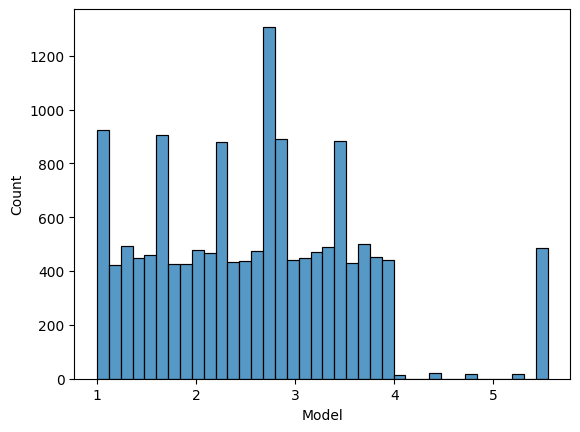

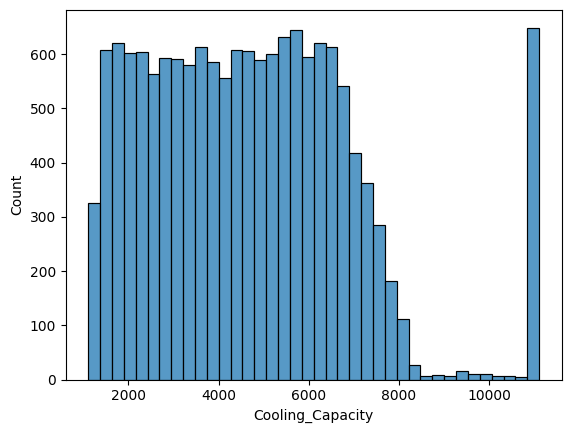

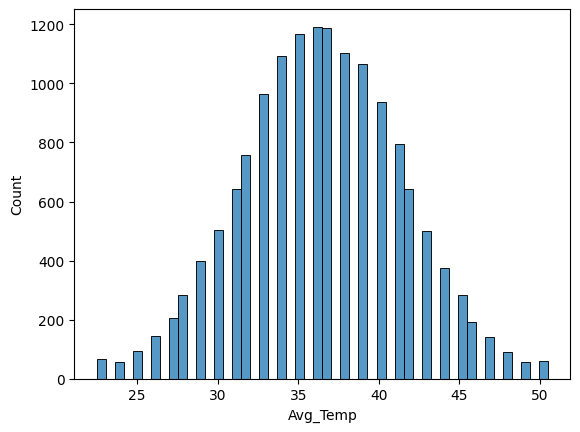

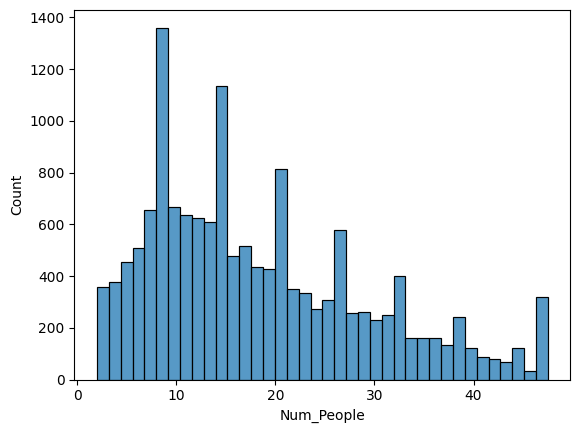

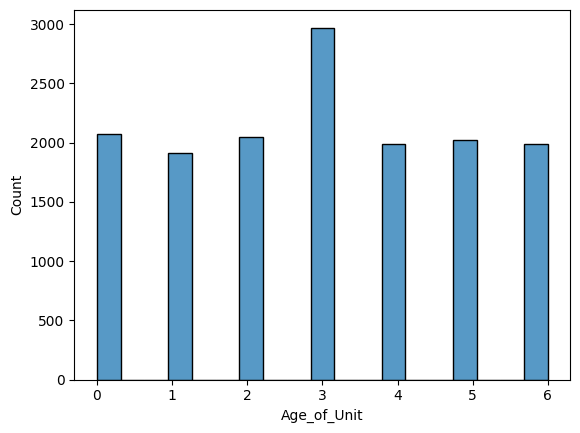

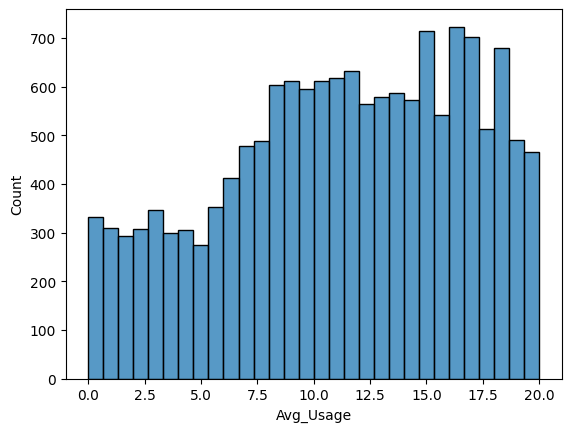

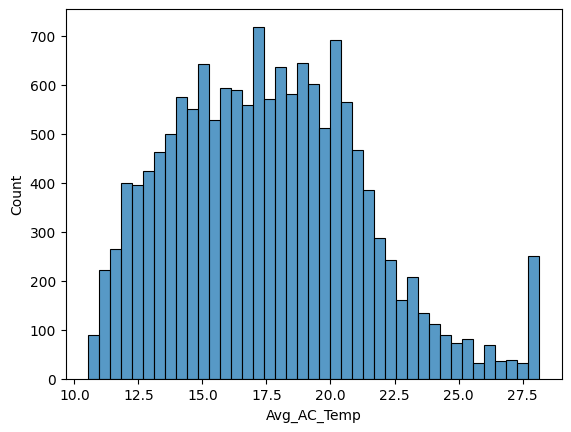

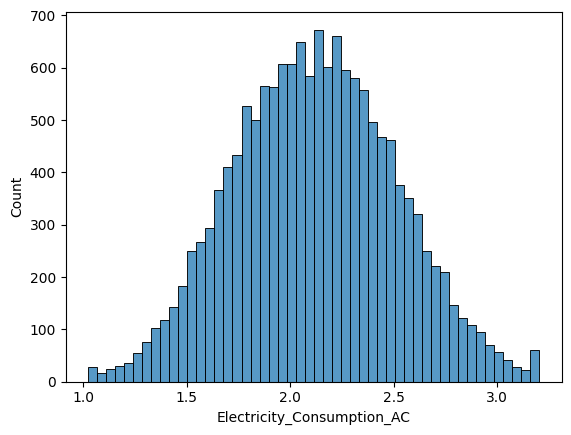

In [74]:
for i in df.columns:
  if df[i].dtype=='float64':
    sns.histplot(data=df, x=i)
    plt.show()

In [75]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Type_of_AC']= label_encoder.fit_transform(df['Type_of_AC'])
df['Room_SIze']= label_encoder.fit_transform(df['Room_SIze'])
df['Star_Rating']= label_encoder.fit_transform(df['Star_Rating'])
df['City']= label_encoder.fit_transform(df['City'])
df['Input_Power']= label_encoder.fit_transform(df['Input_Power'])


In [76]:
df.head()

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC
0,795823.0,2,1.500000,6579.15,43.0,1032,3.0,6,5.0,0,1.720,28.144396,7,5133,1.924
1,506848.0,3,1.100000,6775.44,46.0,565,4.0,7,1.0,0,18.000,28.144396,6,2787,1.341
2,441027.0,1,3.800000,6995.22,29.0,5877,38.0,7,1.0,0,0.551,13.763158,5,5790,2.702
3,160677.0,3,1.200000,1863.68,39.0,334,10.0,7,0.0,0,19.540,22.900000,8,216,1.541
4,902932.0,3,2.749264,3089.04,40.0,3141,9.0,8,4.0,0,16.760,18.444444,5,887,2.182


###Split the data to independent variable and dependent variable

In [77]:
x = df.drop(['Electricity_Consumption_AC'],axis=1)


In [78]:
y = df['Electricity_Consumption_AC']
x.head()

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power
0,795823.0,2,1.500000,6579.15,43.0,1032,3.0,6,5.0,0,1.720,28.144396,7,5133
1,506848.0,3,1.100000,6775.44,46.0,565,4.0,7,1.0,0,18.000,28.144396,6,2787
2,441027.0,1,3.800000,6995.22,29.0,5877,38.0,7,1.0,0,0.551,13.763158,5,5790
3,160677.0,3,1.200000,1863.68,39.0,334,10.0,7,0.0,0,19.540,22.900000,8,216
4,902932.0,3,2.749264,3089.04,40.0,3141,9.0,8,4.0,0,16.760,18.444444,5,887


##Spliting the data to Test and Train

In [80]:
x_train = x
x_test = pd.read_csv('test.csv')
ytrain = y

In [81]:
ytrain.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15000 entries, 0 to 14999
Series name: Electricity_Consumption_AC
Non-Null Count  Dtype  
--------------  -----  
15000 non-null  float64
dtypes: float64(1)
memory usage: 117.3 KB


In [82]:
# model selection
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(x_train,ytrain)

ypridict=model1.predict(x_train)


In [83]:
from sklearn.metrics import r2_score
score = 100*(r2_score(ytrain,ypridict))
score

95.30275444479038

In [85]:
from sklearn.tree import DecisionTreeRegressor

Tree_model=DecisionTreeRegressor()
Tree_model.fit(x_train,ytrain)
Tree_predict=Tree_model.predict(x_train)

scorel = 100*(r2_score(ytrain,Tree_predict))
scorel


100.0

In [87]:

x_test['Type_of_AC']= label_encoder.fit_transform(x_test['Type_of_AC'])
x_test['Room_SIze']= label_encoder.fit_transform(x_test['Room_SIze'])
x_test['Star_Rating']= label_encoder.fit_transform(x_test['Star_Rating'])
x_test['City']= label_encoder.fit_transform(x_test['City'])
x_test['Input_Power']= label_encoder.fit_transform(x_test['Input_Power'])

In [89]:
x_test.head()

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power
0,191220,1,2.1,4283.40,35,3489,9,8,5.0,0,8.770,14.888889,11,2146
1,174111,2,1.0,2157.10,29,132,12,5,3.0,0,15.022,12.416667,11,1125
2,614605,2,3.3,3484.60,31,2680,30,5,4.0,0,18.352,15.033333,5,495
3,865325,1,2.6,1270.08,32,1720,9,3,0.0,0,16.512,15.555556,7,1483
4,134921,0,2.0,4947.60,32,1264,24,6,2.0,1,17.856,11.333333,9,4403


In [90]:
x_test.isnull().sum()/100

ID                  0.00
Type_of_AC          0.00
Model               2.95
Cooling_Capacity    0.00
Avg_Temp            0.00
Room_SIze           0.00
Num_People          0.00
Star_Rating         0.00
Age_of_Unit         3.35
Maintenance         0.00
Avg_Usage           0.00
Avg_AC_Temp         0.00
City                0.00
Input_Power         0.00
dtype: float64

In [91]:
for i in x_test.columns:
  if x_test[i].dtype!='object':
    x_test[i].fillna(x_test[i].mean(),inplace=True)

In [92]:
for i in x_test.columns:
  if x_test[i].dtype=='object':
    x_test[i].fillna(x_test[i].mode()[0],inplace=True)

In [93]:
x_test.isnull().sum()

ID                  0
Type_of_AC          0
Model               0
Cooling_Capacity    0
Avg_Temp            0
Room_SIze           0
Num_People          0
Star_Rating         0
Age_of_Unit         0
Maintenance         0
Avg_Usage           0
Avg_AC_Temp         0
City                0
Input_Power         0
dtype: int64

In [94]:
Tree_predict_test=Tree_model.predict(x_test)

In [96]:
x_test['prediction'] = Tree_predict_test

In [99]:
x_test.to_csv('test1.csv')

#Pickling the model

In [47]:
import pickle

In [48]:
filename = 'regrestion.pkl'

In [49]:
pickle.dump(Tree_model, open(filename, 'wb'))